In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier

In [3]:
#loading and reading the first five columns
data=pd.read_csv("hd_data.csv")
data.head()


,BMI,PhysicalHealth,MentalHealth,Smoking,AlcoholDrinking,Sex,Asthma,HeartDisease
0,16.60,3.0,30.0,Yes,No,Female,Yes,No
1,20.34,0.0,0.0,No,No,Female,No,No
2,26.58,20.0,30.0,Yes,No,Male,Yes,No
3,24.21,0.0,0.0,No,No,Female,No,No
4,23.71,28.0,0.0,No,No,Female,No,No


In [4]:
#checking for nullvalues
data.isnull().sum()

BMI                0
PhysicalHealth     0
MentalHealth       0
Smoking            0
AlcoholDrinking    0
Sex                0
Asthma             0
HeartDisease       0
dtype: int64

In [5]:

#displaying statisctical values for quatitative variables
numerical_data=data[['BMI', 'PhysicalHealth', 'MentalHealth']].describe()
data[['BMI', 'PhysicalHealth', 'MentalHealth']].describe()

,BMI,PhysicalHealth,MentalHealth
count,2500.000000,2500.000000,2500.000000
mean,29.236500,4.261200,3.818000
std,6.577619,8.730284,7.981325
min,12.480000,0.000000,0.000000
25%,24.765000,0.000000,0.000000
50%,28.250000,0.000000,0.000000
75%,32.920000,3.000000,3.000000
max,75.820000,30.000000,30.000000


No     2203
Yes     297
Name: HeartDisease, dtype: int64


Text(0.5, 1.0, 'distribution to show the imbalanced target')

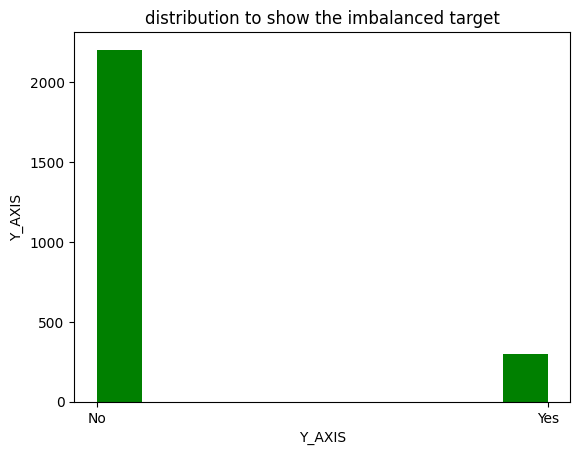

In [6]:
#A histogram to check the distribution of our target values.
#checking whether it is an imbalance dataset
print(data.HeartDisease.value_counts())
plt.hist(data.HeartDisease,color="green")
plt.xlabel("Y_AXIS")
plt.ylabel("Y_AXIS")
plt.title("distribution to show the imbalanced target")

                     BMI  PhysicalHealth  MentalHealth
BMI             1.000000        0.101707      0.043986
PhysicalHealth  0.101707        1.000000      0.280964
MentalHealth    0.043986        0.280964      1.000000


<AxesSubplot: >

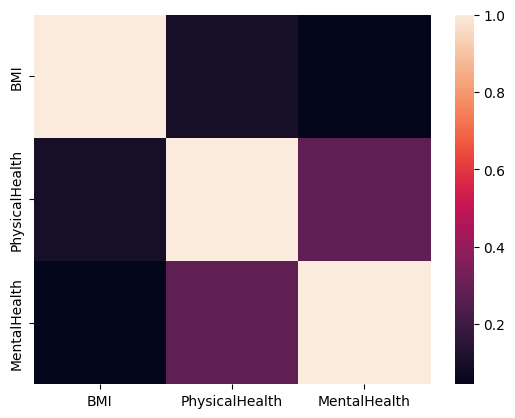

In [7]:
#checking the correlation coeficiency of numerical variables
numerical=data[["BMI",'PhysicalHealth', 'MentalHealth']]
print(numerical.corr())

sns.heatmap(numerical.corr())

Text(0.5, 1.0, 'outliers detection')

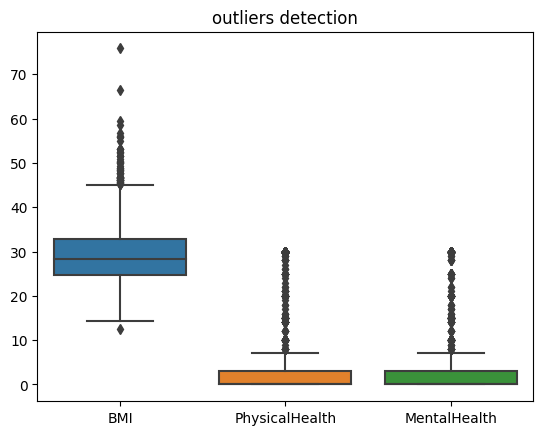

In [8]:
#evaluating the relationship of numerical variables
sns.boxplot(numerical).set_title("outliers detection")


In [9]:
#values of alcohol drinker compared to heart disease
alcohol_no=data[data["AlcoholDrinking"] =="No"]
print(len(alcohol_no))
alcohol=data[data["AlcoholDrinking"] =="Yes"]
print(len(alcohol))
#


2406
94


Text(0.5, 1.0, 'distribution of gender ')

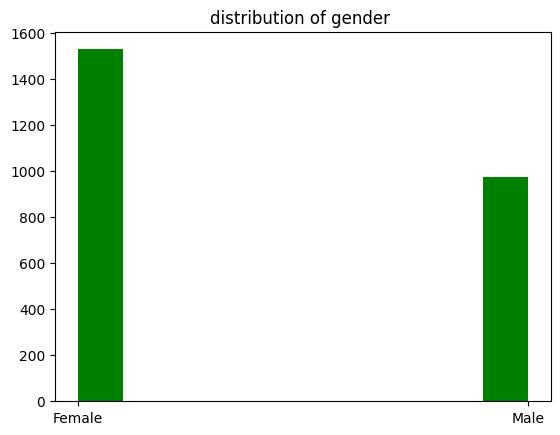

In [10]:
#comparison of heart rate test based on gender
plt.hist(data.Sex,color="green")
plt.title("distribution of gender ")


In [11]:
#dropping the BMI which is the outlier
filtered_data=data.drop(['BMI'],axis=1)
filtered_data.head()

,PhysicalHealth,MentalHealth,Smoking,AlcoholDrinking,Sex,Asthma,HeartDisease
0,3.0,30.0,Yes,No,Female,Yes,No
1,0.0,0.0,No,No,Female,No,No
2,20.0,30.0,Yes,No,Male,Yes,No
3,0.0,0.0,No,No,Female,No,No
4,28.0,0.0,No,No,Female,No,No


In [12]:
#encoding the new dataframe without outliers
encoder=LabelEncoder()

encoded_data=filtered_data.apply(LabelEncoder().fit_transform)
x=encoded_data.drop(["HeartDisease"],axis=1)
y=encoded_data["HeartDisease"]

In [13]:
#converting imbalanced to balanced data

from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x,y= oversample.fit_resample(x,y)

In [14]:
#checking the counts of classes on  the target dataframe 
x.shape
y=pd.DataFrame(y)
print(y.value_counts())
y.shape

HeartDisease
0               2203
1               2203
dtype: int64


(4406, 1)

In [15]:
#splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
#fit the data into the svm classifier
model=svm.SVC(kernel="linear")
model.fit(x_train,y_train)
score=model.score(x_test,y_test)
pred=model.predict(x_test)
print("MODEL ACCURACY {score}",score*100)

C:\Users\wakalioa\miniconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MODEL ACCURACY {score} 61.71298922291548


In [16]:
#confusion matrix of the model
confusion_matrix(y_test,pred)

array([[546, 372],
       [303, 542]], dtype=int64)

In [17]:
#using decision tree clasifier
classifier=DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
classifier.fit(x_train,y_train)
score=classifier.score(x_test,y_test) 
y_pred=model.predict(x_test)
print("Decisiontree  {score}: ", score*100)

Decisiontree  {score}:  62.847419171866136


In [18]:
#confusion matrix of decision tree
confusion_matrix(y_test,y_pred)

array([[546, 372],
       [303, 542]], dtype=int64)